Expression levels of $77$ proteins obtained from $38$ normal genotype control mice  and from $34$ of their trisomic littermates, both with and without treatment with the drug memantine and with and without the stimulation to learn.

The data is from Higuera C, Gardiner KJ, Cios KJ. "Self-Organizing Feature Maps Identify Proteins Critical to Learning in a Mouse Model of Down Syndrome", PLoS One (2015)

In [1]:
import numpy as np
import pandas as pd

import networkx as nx

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib import colormaps as cm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import clustergraph.clustergraph as cg
from clustergraph.utils import get_clusters_from_scikit
import clustergraph.plot_graph as pg

## Read and process data

In [2]:
df = pd.read_csv("data/mice_protein_no_NaN.csv")
X = df.iloc[:, :-1].to_numpy()  # drop of the labels column


def get_learning_outcome(lab):
    if lab == "c-CS-s" or lab == "c-CS-m":
        return "Normal"

    elif lab == "t-CS-s":
        return "Failed"

    elif lab == "t-CS-m":
        return "Rescued"

    else:
        return "No_learning"


labels = [get_learning_outcome(lab) for lab in df["class"]]
df["label"] = labels
df

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,class,label
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.132539,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,c-CS-m,Normal
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.132539,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,c-CS-m,Normal
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.132539,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,c-CS-m,Normal
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.132539,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,c-CS-m,Normal
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.132539,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,c-CS-m,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,1.057971,...,0.137082,0.115806,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,t-SC-s,No_learning
1076,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,1.081150,...,0.137082,0.113614,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,t-SC-s,No_learning
1077,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,0.884342,...,0.137082,0.118948,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,t-SC-s,No_learning
1078,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,0.922595,...,0.137082,0.125295,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,t-SC-s,No_learning


## Clustering

In [3]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X.shape)

pca = PCA(0.95)
X_pca = pca.fit_transform(X)

model = KMeans(18, random_state=42)
pred = model.fit_predict(X_pca)

(1080, 77)


C:\Users\mathi\anaconda3\envs\tda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mathi\anaconda3\envs\tda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


## ClusterGraph

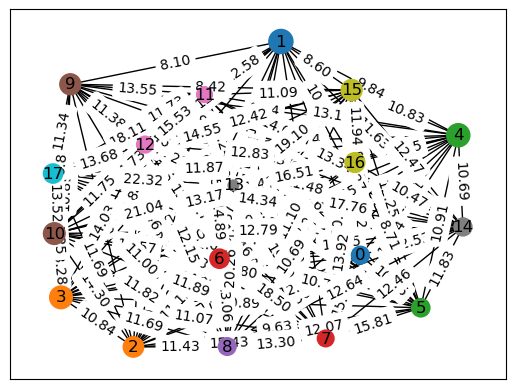

In [4]:
cluster_g = cg.ClusterGraph(
    clusters=get_clusters_from_scikit(pred), X=X_pca, metric_clusters="average"
)

# Coloring the graph
cluster_g.color_graph(
    node_color_labels=pred,
    node_palette=cm.get_cmap("tab10"),
)

pg.draw_graph(cluster_g.Graph, size_nodes=1000, random_state=42)

## Connectivity pruning

In [ ]:
connectivity_graph, conn = cluster_g.prune_conn(score=True)

connectivity_graph = cluster_g.prune_conn(nb_edge_pruned=130)
pg.draw_graph(connectivity_graph, size_nodes=1000, random_state=42)

## Pie chart visualization

In [ ]:
cluster_color_dict = {
    "Failed": "#D81B60",
    "No_learning": "#FFC107",
    "Normal": "#1E88E5",
    "Rescued": "#004D40",
}

clusters_hexa = np.array([cluster_color_dict[c] for c in labels])

import matplotlib.patches as mpatches

keys = list(cluster_color_dict)
patches = [mpatches.Patch(color=cluster_color_dict[k], label=k) for k in keys]

In [ ]:
# Coloring the graph with the labels
cluster_g.color_graph(
    node_color_labels=clusters_hexa,  # here the labels already contain the colors
)

connectivity_graph = cluster_g.prune_conn(nb_edge_pruned=130)

In [ ]:
nb = len(list(connectivity_graph.edges))
pg.draw_graph_pie(
    connectivity_graph,
    nb_edges=nb,
    random_state=40,
    variable="weight_plot",
    size_nodes=0.06,
    font_size=8,
)
plt.legend(handles=patches)
plt.show()

# Other methods

In [ ]:
import umap as um

uma = um.UMAP(n_neighbors=15, random_state=42)
X_umap = uma.fit_transform(X)

In [ ]:
import phate

phate_operator = phate.PHATE(n_jobs=-2)
X_phate = phate_operator.fit_transform(X)

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tnse = tsne.fit_transform(X)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X)

In [ ]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2, n_neighbors=10)
X_isomap = isomap.fit_transform(X)

In [ ]:
from minisom import MiniSom
som_size = (10, 10)
som = MiniSom(x=som_size[0], y=som_size[1], input_len=77, sigma=1.0, learning_rate=0.5)

som.random_weights_init(X)
som.train_random(X, 1000)  # Train for 1000 iterations

# Get the Best Matching Units (BMUs) for each sample
bmus = np.array([som.winner(x) for x in X])
bmu_x, bmu_y = bmus[:, 0], bmus[:, 1]

In [ ]:
import scanpy as sc
import anndata
from sklearn.impute import SimpleImputer

X_ann = df.iloc[:, :-2].to_numpy()
adata = anndata.AnnData(X_ann)

# Preprocessing: Normalize, log-transform, and compute neighbors
sc.pp.normalize_total(adata, target_sum=1e4)  # Normalize per cell
print("NaNs before log1p:", np.any(np.isnan(adata.X)))
adata.X += 1e-6  # Avoid log(0)
sc.pp.log1p(adata)  # Log-transform

imputer = SimpleImputer(strategy="mean")
adata.X = imputer.fit_transform(adata.X)

sc.pp.pca(adata)  # Compute PCA
sc.pp.neighbors(adata)  # Build the nearest neighbor graph

# Clustering: Use Louvain or Leiden to define cell groups
sc.tl.louvain(adata)  # Assigns clusters to cells
adata.obs["clusters"] = adata.obs["louvain"]  # Store clusters
#adata.obs["clusters_hexa"] = clusters_hexa
adata.obs["labels"] = labels
# Compute PAGA
sc.tl.paga(adata, groups="clusters")  # Build trajectory graph

# Layout and visualization
sc.pl.paga(adata, color="labels", show=True, frameon=False, title="PAGA Graph", cmap='tab10')

In [ ]:
import scanpy as sc
import anndata
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import numpy as np

X_ann = df.iloc[:, :-2].to_numpy()
adata = anndata.AnnData(X_ann)

# Preprocessing: Normalize, log-transform, and compute neighbors
sc.pp.normalize_total(adata, target_sum=1e4)  # Normalize per cell
print("NaNs before log1p:", np.any(np.isnan(adata.X)))
adata.X += 1e-6  # Avoid log(0)
sc.pp.log1p(adata)  # Log-transform

imputer = SimpleImputer(strategy="mean")
adata.X = imputer.fit_transform(adata.X)

sc.pp.pca(adata)  # Compute PCA
sc.pp.neighbors(adata)  # Build the nearest neighbor graph

# Clustering: Use Louvain or Leiden to define cell groups
sc.tl.louvain(adata)  # Assigns clusters to cells
adata.obs["clusters"] = adata.obs["louvain"]  # Store clusters
adata.obs["labels"] = labels  # Assign labels

# Compute PAGA
sc.tl.paga(adata, groups="clusters")  # Build trajectory graph

# Plot PAGA with a chosen color map
sc.pl.paga(adata, color="labels", show=False, frameon=False, title="PAGA Graph", cmap='tab10')

# Now, let's manually create a legend for the labels

# Get the unique labels
unique_labels = adata.obs['labels'].cat.categories.tolist()  # Convert to list

# Get the colormap ('tab10') and generate the corresponding colors
cmap = plt.cm.tab10  # Directly using 'tab10'
colors = [cmap(i) for i in range(len(unique_labels))]

# Map labels to their corresponding colors
label_color_map = dict(zip(unique_labels, colors))

# Print the label-color mapping
print("Label to Color Mapping:")
for label, color in label_color_map.items():
    print(f"{label}: {color}")

# Optional: Create a legend manually to add to the plot
from matplotlib.lines import Line2D

# Create legend handles
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) 
           for color in colors]

# Adjust the position of the legend
plt.legend(handles=handles, labels=unique_labels, bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()  # Adjust layout to make sure the legend fits within the figure
plt.show()


## All combined

In [ ]:
for u, v, data in connectivity_graph.edges(data=True):
    connectivity_graph.edges[(u, v)]["spring"] = 1 / data["weight_plot"] * 10

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

pos = nx.spring_layout(
    connectivity_graph, seed=42, iterations=100, scale=1, center=(0, 0), weight="spring"
)

nx.draw_networkx_edges(connectivity_graph, pos=pos, ax=axs[0, 0])

edge_labels = {
    (u, v): "{:.1f}".format(data["weight_plot"])
    for u, v, data in connectivity_graph.edges(data=True)
}
nx.draw_networkx_edge_labels(
    connectivity_graph,
    pos,
    edge_labels=edge_labels,
    font_color="black",
    font_size=9,
    ax=axs[0, 0],
)

xlim = axs[0, 0].get_xlim()
ylim = axs[0, 0].get_ylim()

for node, data in connectivity_graph.nodes(data=True):

    attributes = connectivity_graph.nodes[node]["data_perc_labels"]
    keys = list(attributes)
    attrs = [attributes[k] for k in keys]

    axs[0, 0].pie(
        attrs,
        center=pos[node],
        colors=[k for k in keys],
        radius=max(data["size_plot"] * 0.3, 0.05),
        frame=True,
    )


axs[0, 0].legend(handles=patches, loc="upper left")

axs[0, 0].set_aspect("auto")
xlim = (xlim[0] * 0.9, xlim[1] * 0.9)
axs[0, 0].set_xlim(xlim)
axs[0, 0].set_ylim((-(xlim[1] - xlim[0]) / 2, (xlim[1] - xlim[0]) / 2))


axs[0, 0].set_title("(a) ClusterGraph", fontname="serif", family="cmr10", size=18)

axs[0, 1].scatter(X_umap[:, 0], X_umap[:, 1], c=clusters_hexa)
axs[0, 1].set_title("(b) UMAP", fontname="serif", family="cmr10", size=18)


axs[1, 0].scatter(X_tnse[:, 0], X_tnse[:, 1], c=clusters_hexa)
axs[1, 0].set_title("(c) t-SNE", fontname="serif", family="cmr10", size=18)

axs[1, 1].scatter(X_phate[:, 0], X_phate[:, 1], c=clusters_hexa)
axs[1, 1].set_title("(d) PHATE", fontname="serif", family="cmr10", size=18)

axs[2, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_hexa)
axs[2, 0].set_title("(e) PCA", fontname="serif", family="cmr10", size=18)

axs[2, 1].scatter(X_mds[:, 0], X_mds[:, 1], c=clusters_hexa)
axs[2, 1].set_title("(d) MDS", fontname="serif", family="cmr10", size=18)

axs[2, 2].scatter(X_mds[:, 0], X_mds[:, 1], c=clusters_hexa)
axs[2, 2].set_title("(d) ISOMAP", fontname="serif", family="cmr10", size=18)

scatter = axs[0, 2].scatter(bmu_x, bmu_y, c=clusters_hexa, edgecolors="k")
axs[0, 2].set_title("(e) SOM", fontname="serif", family="cmr10", size=18)
axs[0, 2].set_xticks(range(som_size[0]))  # Grid x-axis
axs[0, 2].set_yticks(range(som_size[1]))  # Grid y-axis
axs[0, 2].grid(True, linestyle="--", linewidth=0.5)

plt.tight_layout()
# plt.savefig("mice.pdf")
plt.show()

# All with same colors

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'unique_labels' is the list of unique labels you have
unique_labels = adata.obs['labels'].cat.categories.tolist()  # Convert to list

# Get the colormap ('tab10') and generate the corresponding colors
cmap = plt.cm.tab10  # Directly using 'tab10'
colors = [cmap(i) for i in range(len(unique_labels))]

# Convert RGB colors to hexadecimal
label_color_map = {label: matplotlib.colors.rgb2hex(color[:3]) for label, color in zip(unique_labels, colors)}

# Print the resulting color map
print(label_color_map)
hex_colors = [label_color_map[label] for label in labels]
hex_colors

In [ ]:
# Coloring the graph with the labels
cluster_g.color_graph(
    node_color_labels=np.array(hex_colors),  # here the labels already contain the colors
)

connectivity_graph = cluster_g.prune_conn(nb_edge_pruned=130)

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

pos = nx.spring_layout(
    connectivity_graph, seed=42, iterations=100, scale=1, center=(0, 0), weight="spring"
)

nx.draw_networkx_edges(connectivity_graph, pos=pos, ax=axs[0, 0])

edge_labels = {
    (u, v): "{:.1f}".format(data["weight_plot"])
    for u, v, data in connectivity_graph.edges(data=True)
}
nx.draw_networkx_edge_labels(
    connectivity_graph,
    pos,
    edge_labels=edge_labels,
    font_color="black",
    font_size=9,
    ax=axs[0, 0],
)

xlim = axs[0, 0].get_xlim()
ylim = axs[0, 0].get_ylim()

for node, data in connectivity_graph.nodes(data=True):

    attributes = connectivity_graph.nodes[node]["data_perc_labels"]
    keys = list(attributes)
    attrs = [attributes[k] for k in keys]

    axs[0, 0].pie(
        attrs,
        center=pos[node],
        colors=[k for k in keys],
        radius=max(data["size_plot"] * 0.3, 0.05),
        frame=True,
    )


axs[0, 0].legend(handles=patches, loc="upper left")

axs[0, 0].set_aspect("auto")
xlim = (xlim[0] * 0.9, xlim[1] * 0.9)
axs[0, 0].set_xlim(xlim)
axs[0, 0].set_ylim((-(xlim[1] - xlim[0]) / 2, (xlim[1] - xlim[0]) / 2))


axs[0, 0].set_title("(a) ClusterGraph", fontname="serif", family="cmr10", size=18)

axs[0, 1].scatter(X_umap[:, 0], X_umap[:, 1], c=hex_colors)
axs[0, 1].set_title("(b) UMAP", fontname="serif", family="cmr10", size=18)

axs[0, 2].scatter(X_tnse[:, 0], X_tnse[:, 1], c=hex_colors)
axs[0, 2].set_title("(c) t-SNE", fontname="serif", family="cmr10", size=18)

sc.pl.paga(adata, color="labels", show=False, frameon=False, title="(d) PAGA Graph", cmap='tab10', ax=axs[1,0])

scatter = axs[1, 1].scatter(bmu_x, bmu_y, c=hex_colors, edgecolors="k", s=180)
axs[1, 1].set_title("(e) SOM", fontname="serif", family="cmr10", size=18)
axs[1, 1].set_xticks(range(som_size[0]))  # Grid x-axis
axs[1, 1].set_yticks(range(som_size[1]))  # Grid y-axis
axs[1, 1].grid(True, linestyle="--", linewidth=0.5)


axs[1, 2].scatter(X_phate[:, 0], X_phate[:, 1], c=hex_colors)
axs[1, 2].set_title("(f) PHATE", fontname="serif", family="cmr10", size=18)

axs[2, 0].scatter(X_mds[:, 0], X_mds[:, 1], c=hex_colors)
axs[2, 0].set_title("(g) ISOMAP", fontname="serif", family="cmr10", size=18)


axs[2, 1].scatter(X_pca[:, 0], X_pca[:, 1], c=hex_colors)
axs[2, 1].set_title("(h) PCA", fontname="serif", family="cmr10", size=18)

axs[2, 2].scatter(X_mds[:, 0], X_mds[:, 1], c=hex_colors)
axs[2, 2].set_title("(i) MDS", fontname="serif", family="cmr10", size=18)


plt.tight_layout()
plt.savefig("mice.pdf")
plt.show()